In [2]:
import numpy as np

class Bandit:
    """
    Implementación de un Bandido Multibrazo (Multi-Armed Bandit) basado
    en una distribución binomial

    Parameters
    ----------
    probability : float
        Probabilidad de que el objeto devuelva una recompensa
    
    Attributes
    ----------
    rewards : array
        Históricos de recompensas generadas por el bandido
    mean : float
        Recompensa media histórica del bandido
    plays : integer
        Cantidad de veces que ha jugado con el bandido

    Methods
    -------
    pull :
        Realiza una tirada en el bandido
        
    """
    def __init__(self, probability):
        self.probability = probability
        self.rewards = []
        self.mean = 0
        self.plays = 0
        
        
    def pull(self):
        # Obtención de una nueva recompensa
        reward = np.random.binomial(1, self.probability)
        
        # Agregación de la recompensa al listado
        self.rewards.append(reward)
        
        # Actualización de la media (es más rápido que usar la función media de la recompensa)
        self.plays += 1
        self.mean = (1 - 1.0/self.plays) * self.mean + 1.0/self.plays * reward
        
        return reward

In [3]:
np.random.seed(0)
    
bandits = [Bandit(0.02), Bandit(0.04), Bandit(0.06), Bandit(0.08), Bandit(0.10)]
evaluations = 8500
eps = 0.05

rewards = [] 

for i in range(evaluations):
    p = np.random.random()
    
    if p < eps:
        j = np.random.choice(len(bandits))
    else:
        means = [b.mean for b in bandits]
        max_bandits = np.where(means == np.max(means))[0]
        j = np.random.choice(max_bandits)
        
    rewards.append(bandits[j].pull())
    
total_reward = np.sum([np.sum(bandit.rewards) for bandit in bandits])
avg_reward = total_reward / evaluations

In [4]:
print('Numero de evaluaciones del bandido seleccionado: ',evaluations)
print('Numero de recompensas: ',total_reward)
print('Porcentaje de recompensas: ',"{:.2%}". format(avg_reward))
print('Porcentaje de recompensas del bandido óptimo: ',"{:.2%}". format(0.10))

Numero de evaluaciones del bandido seleccionado:  8500
Numero de recompensas:  817
Porcentaje de recompensas:  9.61%
Porcentaje de recompensas del bandido óptimo:  10.00%


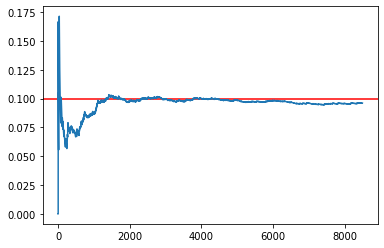

In [5]:
import matplotlib.pyplot as plt

cumulative_average = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
plt.axhline(y=0.1, color='r', linestyle='-')
plt.plot(range(len(rewards)), cumulative_average);

# Otro ejemplo:

In [6]:
np.random.seed(0)
    
bandits = [Bandit(0.2), Bandit(0.5), Bandit(0.75)]
evaluations = 10000
eps = 0.1

rewards = [] 

for i in range(evaluations):
    p = np.random.random()
    
    if p < eps:
        j = np.random.choice(len(bandits))
    else:
        means = [b.mean for b in bandits]
        max_bandits = np.where(means == np.max(means))[0]
        j = np.random.choice(max_bandits)
        
    rewards.append(bandits[j].pull())
    
total_reward = np.sum([np.sum(bandit.rewards) for bandit in bandits])
avg_reward = total_reward / evaluations

In [8]:
print('Numero de evaluaciones del bandido seleccionado: ',evaluations)
print('Numero de recompensas: ',total_reward)
print('Porcentaje de recompensas: ',"{:.2%}". format(avg_reward))
print('Porcentaje de recompensas del bandido óptimo: ',"{:.2%}". format(0.75))

Numero de evaluaciones del bandido seleccionado:  10000
Numero de recompensas:  7262
Porcentaje de recompensas:  72.62%
Porcentaje de recompensas del bandido óptimo:  75.00%


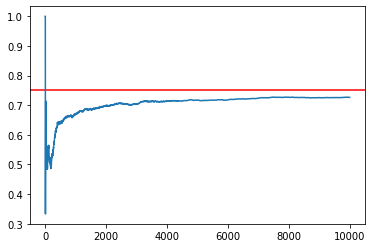

In [10]:
import matplotlib.pyplot as plt

cumulative_average = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
plt.axhline(y=0.75, color='r', linestyle='-')
plt.plot(range(len(rewards)), cumulative_average);